# Create and visualize Data

## Import libraries

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [142]:
x , y = make_regression(n_samples=1000 , n_features = 4 , noise = 0.1) # create dataset : x with 4 features (4 variables explicatives)

y= y.reshape(-1,1) # from (1000,) to (1000,1)

x.shape , y.shape

((1000, 4), (1000, 1))

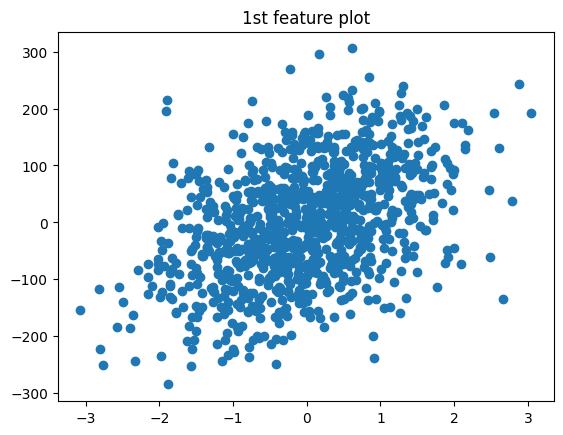

In [143]:
plt.scatter(x[:,0],y)
plt.title("1st feature plot")
plt.show()

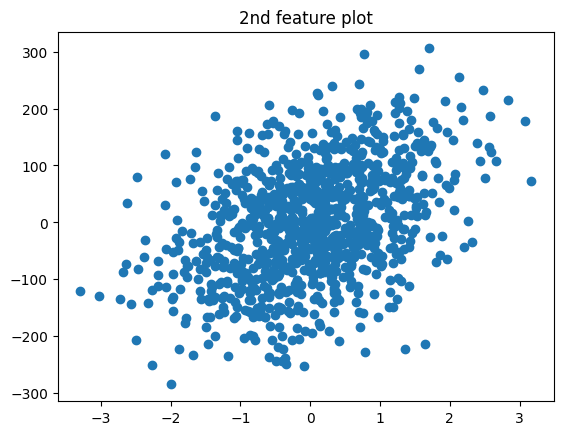

In [144]:
plt.scatter(x[:,1],y)
plt.title("2nd feature plot")
plt.show()

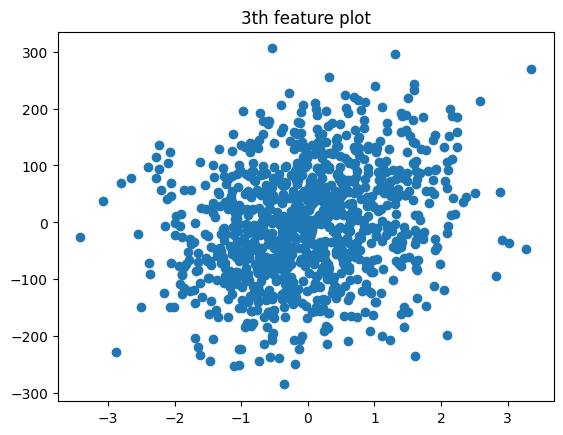

In [145]:
plt.scatter(x[:,2],y)
plt.title("3th feature plot")
plt.show()

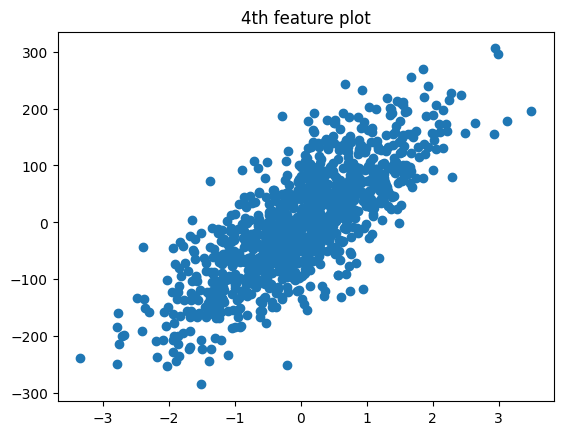

In [146]:
plt.scatter(x[:,3],y)
plt.title("4th feature plot")
plt.show()

##  Helper functions

In [147]:
def model(X,beta):
  return X.dot(beta)

#grad function
def grad(X,y,beta):
  n=len(y)
  return (2/n)*X.T.dot(model(X,beta)-y)

#gradient_descent function
def gradient_descent(X,y,beta,learning_rate=0.01, n_iteration=1000):
  for i in range(n_iteration):
    beta=beta-learning_rate*grad(X,y,beta)
  return beta

#least squares function
def least_squares(X,y):
    term = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return term

# mean squared error
def fonction_cout(X,beta,y):
  n=len(X)
  term=model(X,beta)-y
  return (1/n)*term.T.dot(term)[0,0]

## Generate X and beta and create data for train and validation

In [148]:
def generate_X(x):
  m = x.shape[0] # nbr of samples
  n = x.shape[1] # nbr of features (variables explicatives)

  X = np.ones((m,1))  # create column of ones

  beta = np.random.randn(n+1,1) # initialize beta with random values

  # iterate over number of features
  for i in range(n):
    X = np.hstack( ( X, x[:,i].reshape(-1,1) ))  # horizental stack to add other features horizentaly

  return X , beta

X, beta =  generate_X(x)

In [149]:
print(X,"\n")
print(f"Shape of X = {X.shape}")

[[ 1.         -1.82551612  0.75719201  1.13442797 -0.75013839]
 [ 1.         -1.06874891 -0.10560445  0.15720237 -0.07702379]
 [ 1.         -1.3543172   1.06936637  0.16523633  0.30485018]
 ...
 [ 1.         -0.6548443  -0.28853808 -0.22102714  1.3226258 ]
 [ 1.          1.65664908  0.00293342 -0.1040528  -0.2851337 ]
 [ 1.         -0.67248583  0.34906402  0.46321653  1.06620352]] 

Shape of X = (1000, 5)


In [150]:
print(beta,"\n")
print(f"Shape of beta = {beta.shape}")

[[-0.40379732]
 [ 1.15749945]
 [-0.55966651]
 [ 0.92645788]
 [ 0.42345672]] 

Shape of beta = (5, 1)


In [151]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)  # Split data to train and validation datasets

## Optimization using Gradient Descent

In [152]:
beta_grad = gradient_descent(X,y,beta,learning_rate=0.01, n_iteration=1000)
beta_grad

array([[-4.59556178e-03],
       [ 4.42814924e+01],
       [ 3.88637100e+01],
       [ 2.34618943e+01],
       [ 7.61582263e+01]])

## Visualize results for each feature

### 1st feature

In [156]:
beta1 = beta_grad[:2] # take beta0 and beta1 for the 1st feature
beta1

array([[-4.59556178e-03],
       [ 4.42814924e+01]])

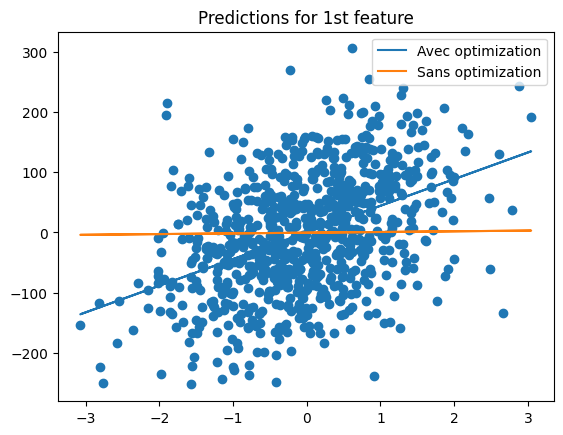

In [189]:
X = X_train[:,:2] # X_train[:,:2] take the ones column and the 1st feature
beta01 = beta[:2] # beta[:2] take beta_0 and beta_1 of intiale beta

y_pred_0 = model(X,beta01)  # predictions before optimization
y_pred = model(X,beta1) # predictions after optimization


plt.scatter(X_train[:,1],y_train) # plot the first feature samples

plt.plot(X_train[:,1] , y_pred,label="Avec optimization") # plot linear regression model before optimization
plt.plot(X_train[:,1] , y_pred_0,label="Sans optimization") # plot linear regression model after optimization


plt.title("Predictions for 1st feature")
plt.legend()
plt.show()

### 2nd feature

In [183]:
beta2 = beta_grad[:4:2] # take beta0 and beta2 for the 2nd feature
beta2

array([[-4.59556178e-03],
       [ 3.88637100e+01]])

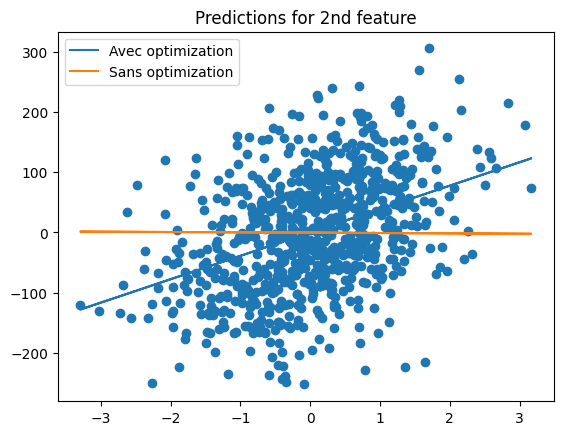

In [188]:
X = X_train[:,:4:2] # X_train[:,:4:2] take the ones column and the 2nd feature
beta02 = beta[:4:2] # beta[:4:2] take beta_0 and beta_2 of intiale beta

y_pred_0 = model(X,beta02)  # predictions before optimization
y_pred = model(X,beta2) # predictions after optimization


plt.scatter(X_train[:,2],y_train) # plot the 2nd feature samples

plt.plot(X_train[:,2] , y_pred,label="Avec optimization") # plot linear regression model before optimization
plt.plot(X_train[:,2] , y_pred_0,label="Sans optimization") # plot linear regression model after optimization

plt.title("Predictions for 2nd feature")
plt.legend()
plt.show()

### 3th feature

In [195]:
beta3 = beta_grad[:5:3] # take beta0 and beta3 for the 3th feature
beta3

array([[-4.59556178e-03],
       [ 2.34618943e+01]])

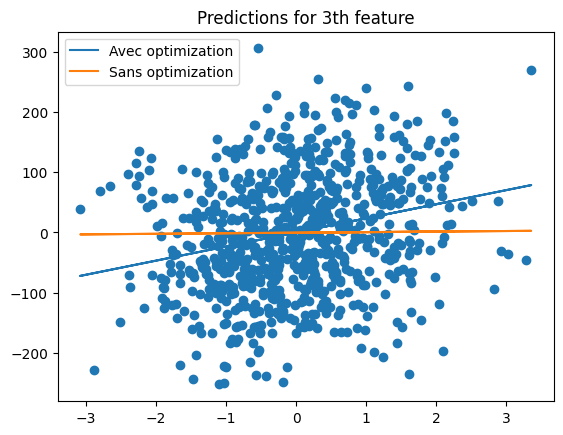

In [198]:
X = X_train[:,:5:3] # X_train[:,:5:3] take the ones column and the 3th feature
beta03 = beta[:5:3] # beta[:5:3] take beta_0 and beta_3 of intiale beta

y_pred_0 = model(X,beta03)  # predictions before optimization
y_pred = model(X,beta3) # predictions after optimization


plt.scatter(X_train[:,3],y_train) # plot the 3th feature samples

plt.plot(X_train[:,3] , y_pred,label="Avec optimization") # plot linear regression model before optimization
plt.plot(X_train[:,3] , y_pred_0,label="Sans optimization") # plot linear regression model after optimization

plt.title("Predictions for 3th feature")
plt.legend()
plt.show()

### 4th feature

In [201]:
beta4 = beta_grad[:6:4] # take beta0 and beta4 for the 3th feature
beta4

array([[-4.59556178e-03],
       [ 7.61582263e+01]])

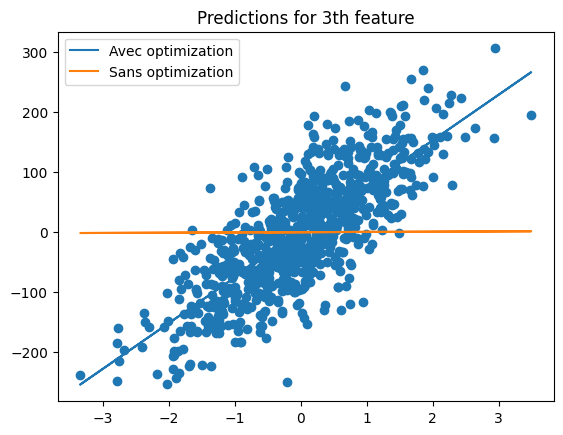

In [203]:
X = X_train[:,:6:4] # X_train[:,:6:4] take the ones column and the 4th feature
beta04 = beta[:6:4] # beta[:6:4] take beta_0 and beta_4 of intiale beta

y_pred_0 = model(X,beta04)  # predictions before optimization
y_pred = model(X,beta4) # predictions after optimization


plt.scatter(X_train[:,4],y_train) # plot the 3th feature samples

plt.plot(X_train[:,4] , y_pred,label="Avec optimization") # plot linear regression model before optimization
plt.plot(X_train[:,4] , y_pred_0,label="Sans optimization") # plot linear regression model after optimization

plt.title("Predictions for 3th feature")
plt.legend()
plt.show()

## Loss over n_iterations

In [206]:
def gradient_descent_loss(X,y,beta,learning_rate=0.001, n_iteration=1000):
  loss_list = [] # create an empty list of losses
  for i in range(n_iteration):
    beta=beta-learning_rate*grad(X,y,beta)  # optimize beta at each iteration
    loss_list.append(fonction_cout(X,beta,y)) # calculate loss at each iteration
  return loss_list


losses  = gradient_descent_loss(X_train,y_train,beta,learning_rate=0.01, n_iteration=1000)

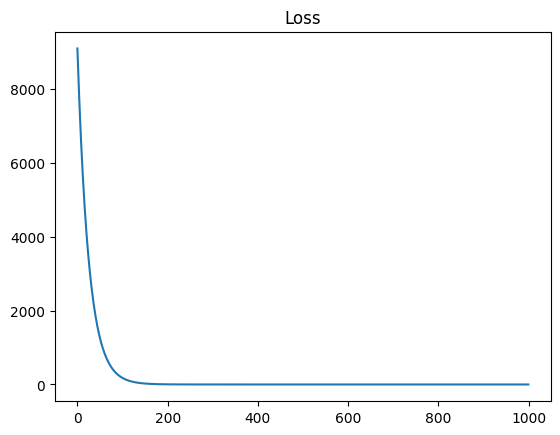

In [208]:
plt.plot(np.arange(1000),losses)
plt.title("Loss")
plt.show()

## Evaluate the model using MSE

In [212]:
mse = fonction_cout(X_test,beta_grad,y_test)
print(f"MSE = {mse:.4f}") # print loss

MSE = 0.0086
